### Análise da situação acadêmica dos alunos da rede pública de ensino da cidade do Recife nos anos de: 2019, 2021 e 2022

No Brasil, um dos setores mais impactados pela pandemia da COVID foi a Educação. Conforme Dados do Censo Escolar(2020), apenas 53% das escolas públicas conseguiram manter o seu calendário letivo original de 2020.

Diante desse fato, escolhemos analisar a situação acadêmica dos alunos do 9º ano, da rede pública da cidade do Recife, nos anos de 2019, 2021 2 2022.  

A Secretaria de Educação do Recife possui uma rede de ensino com 320 unidades escolares, sendo 231 escolas; 47 creches; e 42 creches escola. Além disso, a rede contabiliza cerca de 92 mil estudantes e mais de 5.400 professores. 
É de responsabilidade da Secretaria a educação infantil, para alunos de até 5 anos, o ensino fundamental, do 1º ao 9º ano, o ensino profissionalizante e a Educação de Jovens e Adultos (EJA). Além de promover a inclusão de pessoas com necessidades especiais em todos os níveis de ensino.

Nossa análise deseja saber: 
    - se houve um aumento na quantidade de alunos; 
    - e houve um aumento ou diminuição na aprovação;
    - se houve um aumento ou diminuição na desistência e reprovação.;





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\PROFESSOR\AppData\Local\Temp\ipykernel_10144\3381811058.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
anos = [2019, 2021, 2022]

dados_df = pd.DataFrame()

for ano in anos:
    df = pd.read_csv(f'situacaofinalalunos{ano}.csv', sep=';')
    da = df.loc[(df['anoensino'] == '9º ANO'), ['ano', 'nescolnome', 'ebairrnome', 'cescolrpae', 'anoensino', 'nturesnome', 'mat', 'alunosexo', 'situ', 'esitaldesc']]
    
    dados_df = pd.concat([dados_df, da], ignore_index=True)

dados_df.to_csv('tabela9ano.csv', sep=';', index=False, header=True)

Iniciei um df vazio, depois, criei um df vazio chamado dados_df que será usado para armazenar todos os dados selecionados.
Fiz igual o código antigo, um Loop pelos anos, usando o for, assim preenchemos sobre cada ano na lista de anos especificada.
Em seguida li o CSV e selecionei os dados, então para cada ano, leu o arquivo CSV correspondente e seleciou os dados específicos na condição 'anoensino' == '9º ANO'.
Adicionei dados ao DataFrame dados_df, utilizei o pd.concat (que concactena os dados) para adicionar os dados selecionados ao df dados_df. O  ignore_index=True é utilizado para ignorar os índices originais dos df e criar um novo índice sequencial para evitar duplicação.
Então salvei o DataFrame completo, contendo todos os dados e cabeçalho no arquivo csv. O header=True garante que o arquivo contenha os cabeçalhos e o index=False evita a inclusão do índice no arquivo.

In [3]:
df9ano = pd.read_csv('tabela9ano.csv', sep = ';')
df9ano

,ano,nescolnome,ebairrnome,cescolrpae,anoensino,nturesnome,mat,alunosexo,situ,esitaldesc
0,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,15755274,M,TA,TR DUR ANO P/REDE
1,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,14286068,F,RN,RENV S/SIT FINAL DEF
2,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,5035864,M,RN,RENV S/SIT FINAL DEF
3,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,12059293,M,RN,RENV S/SIT FINAL DEF
4,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,13165470,M,RN,RENV S/SIT FINAL DEF
...,...,...,...,...,...,...,...,...,...,...
8362,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14306131,F,AP,APROVADO
8363,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14328186,M,AP,APROVADO
8364,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15034879,F,AP,APROVADO
8365,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15073009,F,AP,APROVADO


In [4]:
# Renomeando as colunas

df9ano.rename(columns={'ano':'ANO', 'nescolnome':'ESCOLA', 'ebairrnome':'BAIRRO',
        'cescolrpae':'RPA', 'anoensino':'SÉRIE', 'nturesnome':'TURNO',
        'mat':'MATRÍCULA', 'alunosexo':'SEXO','situ':'SITUAÇÃO', 'esitaldesc':'RESULTADO'}, inplace = True)
df9ano

,ANO,ESCOLA,BAIRRO,RPA,SÉRIE,TURNO,MATRÍCULA,SEXO,SITUAÇÃO,RESULTADO
0,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,15755274,M,TA,TR DUR ANO P/REDE
1,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,14286068,F,RN,RENV S/SIT FINAL DEF
2,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,5035864,M,RN,RENV S/SIT FINAL DEF
3,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,12059293,M,RN,RENV S/SIT FINAL DEF
4,2019,ANDRE DE MELO,ESTANCIA,5,9º ANO,TARDE,13165470,M,RN,RENV S/SIT FINAL DEF
...,...,...,...,...,...,...,...,...,...,...
8362,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14306131,F,AP,APROVADO
8363,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,14328186,M,AP,APROVADO
8364,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15034879,F,AP,APROVADO
8365,2022,VILA SESAMO,COHAB,6,9º ANO,TARDE,15073009,F,AP,APROVADO


In [5]:
df9ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ANO        8367 non-null   int64 
 1   ESCOLA     8367 non-null   object
 2   BAIRRO     8367 non-null   object
 3   RPA        8367 non-null   int64 
 4   SÉRIE      8367 non-null   object
 5   TURNO      8367 non-null   object
 6   MATRÍCULA  8367 non-null   int64 
 7   SEXO       8367 non-null   object
 8   SITUAÇÃO   8367 non-null   object
 9   RESULTADO  8367 non-null   object
dtypes: int64(3), object(7)
memory usage: 653.8+ KB


In [6]:
df9ano['ANO'].value_counts()

ANO
2022    3128
2021    2819
2019    2420
Name: count, dtype: int64

In [7]:
df9ano.drop(columns=['SITUAÇÃO'], inplace = True)

In [8]:
df9ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8367 entries, 0 to 8366
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ANO        8367 non-null   int64 
 1   ESCOLA     8367 non-null   object
 2   BAIRRO     8367 non-null   object
 3   RPA        8367 non-null   int64 
 4   SÉRIE      8367 non-null   object
 5   TURNO      8367 non-null   object
 6   MATRÍCULA  8367 non-null   int64 
 7   SEXO       8367 non-null   object
 8   RESULTADO  8367 non-null   object
dtypes: int64(3), object(6)
memory usage: 588.4+ KB


In [9]:
df9ano.isnull().sum()

ANO          0
ESCOLA       0
BAIRRO       0
RPA          0
SÉRIE        0
TURNO        0
MATRÍCULA    0
SEXO         0
RESULTADO    0
dtype: int64

In [10]:
df9ano['ANO'].unique()

array([2019, 2021, 2022], dtype=int64)

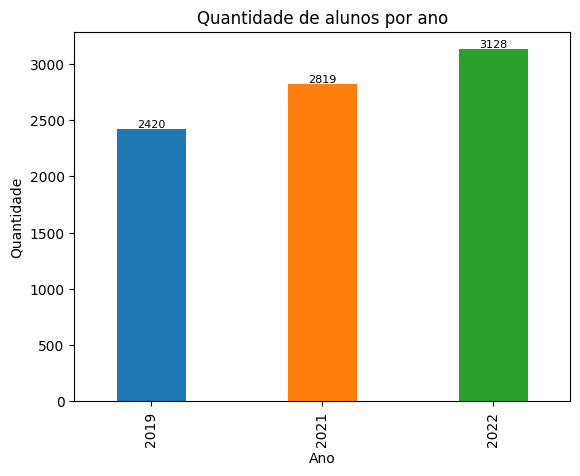

In [11]:
contagem_por_ano2 = df9ano.groupby(['ANO']).ANO.count().sort_values()

ax2 = contagem_por_ano2.plot(kind='bar', width=0.4, color=plt.rcParams['axes.prop_cycle'].by_key()['color'])

for container2 in ax2.containers:
    ax2.bar_label(container2, fmt='%d', label_type='edge', fontsize=8)

plt.title('Quantidade de alunos por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.show()

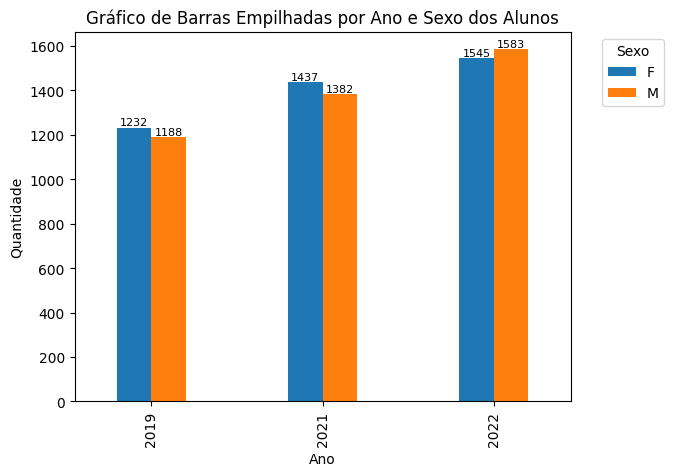

In [12]:
resultados_por_ano = df9ano.groupby(['ANO', 'SEXO']).size().unstack()


ax = resultados_por_ano.plot(kind='bar', width=0.4)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8)

plt.title('Gráfico de Barras Empilhadas por Ano e Sexo dos Alunos')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()